In [21]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import json
# Always make it pretty.
plt.style.use('ggplot')
# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup
import datetime

In [22]:
file = pd.read_csv('data/Collisions.csv')

In [266]:
infl = file[((file['UNDERINFL'] == 'Y') & (file['FATALITIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['FATALITIES'] > 0))].shape[0]
drunkdracc = sum((file['UNDERINFL'] == 'Y') | (file['UNDERINFL'] == '1'))
print('percentage of drunk driving accidents that result in a death: ',(100*infl/drunkdracc))

nondrunkdrivingacccsdeath = file[((file['UNDERINFL'] == 'N') & (file['FATALITIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['FATALITIES'] > 0))].shape[0]
nondrunkdrivingacc = sum((file['UNDERINFL'] == 'N') | (file['UNDERINFL'] == '0'))
print('percentage of NON-drunk driving accidents that result in a death: ',(100*nondrunkdrivingacccsdeath/nondrunkdrivingacc))


percentage of drunk driving accidents that result in a death:  0.966183574879
percentage of NON-drunk driving accidents that result in a death:  0.126712020184


In [24]:
seriousinjury = file[((file['UNDERINFL'] == 'Y') & (file['SERIOUSINJURIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['SERIOUSINJURIES'] > 0))].shape[0]
print('percentage of drunk driving accidents that result in serioius injuries: ',100*seriousinjury/drunkdracc)

seriousinjurynondrunk = file[((file['UNDERINFL'] == 'N') & (file['SERIOUSINJURIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['SERIOUSINJURIES'] > 0))].shape[0]
print('percentage of NON-drunk driving accidents that result in serious injuries: ',100* seriousinjurynondrunk/nondrunkdrivingacc)

percentage of drunk driving accidents that result in serioius injuries:  4.487385936661299
percentage of NON-drunk driving accidents that result in serious injuries:  1.4276220940710038


In [25]:
injurydrunk = file[((file['UNDERINFL'] == 'Y') & (file['INJURIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['INJURIES'] > 0))].shape[0]
injurynondrunk = file[((file['UNDERINFL'] == 'N') & (file['INJURIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['INJURIES'] > 0))].shape[0]
print('percentage of drunk driving accidents that result in injuries',injurydrunk/drunkdracc*100)
print('percentage of NON-drunk driving accidents that result in injuries',injurynondrunk/nondrunkdrivingacc*100)

percentage of drunk driving accidents that result in injuries 41.82501341921632
percentage of NON-drunk driving accidents that result in injuries 30.51563344746801


In [268]:
file['ST_COLCODE'] = pd.to_numeric(file['ST_COLCODE'],errors = 'coerce')
pedestrianfatalties = sum((file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5))
nonpedestrianfatalities = sum((file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 10))
fatalities = (file['FATALITIES'] > 0).sum()
print('percentage of fatalities that involve a pedestrian: ',pedestrianfatalties/fatalities*100)

pedstrianserious = ((file['SERIOUSINJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)).sum()
serioustotal = (file['SERIOUSINJURIES'] > 0).sum()
print('percentage of serious injuries that involve a pedestrian: ',pedstrianserious/serioustotal*100)

pedestrianinjuries =((file['INJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)).sum()
injuriestotal = (file['INJURIES'] > 0).sum()
print('percentage of injuries that involve a pedestrian: ',pedestrianinjuries/injuriestotal*100)

percentage of fatalities that involve a pedestrian:  35.0609756098
percentage of serious injuries that involve a pedestrian:  28.1895093063
percentage of injuries that involve a pedestrian:  11.3598435683


In [27]:
file2 = file.copy()

In [263]:
file2.to_pickle('data/CollionsWDatetime.pkl.bz2', compression = 'bz2')

In [30]:
def datetimeconversion(row):
    try:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y %I:%M:%S %p')
    except:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y')

In [31]:
file2['INCDTTM']=file2.apply(datetimeconversion, axis=1)

In [32]:
def getweather():
    url = 'https://api.darksky.net/forecast/'
    with open('data/dark_sky.txt', 'r') as file:
        key = file.read()
    latlong = '/47.44472,-122.31361,'
    for i in range(5683): #5682 is number of days from beg to end
        time = 1389346020 + (i*24*60*60)
        strtime = str(time)
        finalurl= url+key+latlong+strtime
        r = requests.get(finalurl)
        dic = json.loads(r.content)
        Weather.insert_one(dic)
 
    

In [33]:
from pymongo import MongoClient
import pprint

In [34]:
client = MongoClient('localhost', 27017)
db = client['WeatherDB']
Weather = db['Weather']

In [35]:
Weather.find_one()

{'_id': ObjectId('5d781b8d4cadcc23e8d2595a'),
 'currently': {'apparentTemperature': 41.78,
  'cloudCover': 0.75,
  'dewPoint': 42.8,
  'humidity': 0.9,
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1012.59,
  'summary': 'Mostly Cloudy',
  'temperature': 45.55,
  'time': 1389346020,
  'uvIndex': 0,
  'visibility': 10,
  'windBearing': 202,
  'windGust': 15.46,
  'windSpeed': 7.1},
 'daily': {'data': [{'apparentTemperatureHigh': 46.95,
    'apparentTemperatureHighTime': 1389394800,
    'apparentTemperatureLow': 39.39,
    'apparentTemperatureLowTime': 1389456000,
    'apparentTemperatureMax': 51.81,
    'apparentTemperatureMaxTime': 1389423600,
    'apparentTemperatureMin': 41.71,
    'apparentTemperatureMinTime': 1389348000,
    'cloudCover': 0.96,
    'dewPoint': 42.57,
    'humidity': 0.85,
    'icon': 'rain',
    'moonPhase': 0.35,
    'precipIntensity': 0.0048,
    'precipIntensityMax': 0.03,
    'precipIntensityMaxTime': 1389409200

In [36]:
def getprecipitation(info):
    times = info.find({})
    info = dict()
    for time in times:
        for i in range(len(time['hourly']['data'])):
            t = time['hourly']['data'][i]['time']
            try: 
                rain = time['hourly']['data'][i]['precipIntensity']
            except:
                continue
            dt = datetime.datetime.utcfromtimestamp(t)-datetime.timedelta(hours=8)
            info[dt] = rain
    return info

In [37]:
rain = getprecipitation(Weather)
rainpd = pd.DataFrame.from_dict(rain, orient='index')

In [38]:
def getnorainlist(df,num):
    count = 0
    lst = []
    for i, index in zip(range(df.size),df.index):
        if df.iloc[i,0] == 0:
            count += 1
        if df.iloc[i,0] != 0:
            if count >= num:
                lst.append(index)
            count = 0
    return lst
def getrainlist(df,num,level):
    count = 0
    lst = []
    for i, index in zip(range(df.size),df.index):
        if df.iloc[i,0] > level:
            count += 1
        if df.iloc[i,0] <= level:
            if count >= num:
                lst.append(index)
            count = 0
    return lst

In [39]:
thirtysixhourlst = getnorainlist(rainpd,7)

In [245]:
len(thirtysixhourlst)
seriousrain = getrainlist(rainpd,1,.1)
len(seriousrain)

92

In [41]:
fourhourswetaccidentlst = getrainlist(rainpd,4,0)

In [42]:
fourOonehoursweaccidentlst = getrainlist(rainpd,4,.03)

In [205]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [206]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [320]:
def getaccidentdict(df,lst,timeback):
    diction = dict() 
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        time = i.to_pydatetime()
        timebefore = time - datetime.timedelta(minutes=(timeback*60))
        timeafter =  time - datetime.timedelta(minutes=(timeback*60) + 59)
        accidents = sum((df['INCDTTM'] > timeafter) & (df['INCDTTM'] <= timebefore))
        if accidents > 0:
            diction[time] = accidents
    return diction

def severitywetaccidentsdict(df,lst,kind,timeback):
    diction = dict()
    dictionary = dict()
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        time = i.to_pydatetime()
        timebefore = time - datetime.timedelta(minutes=(timeback*60))
        timeafter =  time - datetime.timedelta(minutes=(timeback*60) + 59)
        accidents = sum((df['INCDTTM'] > timeafter) & (df['INCDTTM'] <= timebefore))
        if accidents > 0:
            diction[time] = accidents
            count =  sum(df[(df['INCDTTM']> timeafter) & (df['INCDTTM']<= timebefore) & (df[kind] > 0)][kind])
            dictionary[time] = count
    return (diction, dictionary)

In [325]:
#wetfourhourinjuriesdict = severitywetaccidentsdict(file2,fourhourswetaccidentlst,'INJURIES',0)
#wetfourhourseriousinjuriesdict = severitywetaccidentsdict(file2,fourhourswetaccidentlst,'SERIOUSINJURIES',0)
#wetfourhourifatalitiesdict = severitywetaccidentsdict(file2,fourhourswetaccidentlst,'FATALITIES',0)

In [327]:
print('WET FOR 3 OR MORE CONSECUTIVE HOURS')
print('Number of accients')
print(sum(wetfourhourinjuriesdict[0].values()))
print(sum(list(fourhourswetaccidentdict.values())))
print('Regular injuries below')
print(sum(wetfourhourinjuriesdict[1].values()))
wetfourhoursinjuriesnuminjuries = list(wetfourhourinjuriesdict[1].values())
print('AVG number of regular injuries per time period:', sum(wetfourhoursinjuriesnuminjuries)/len(wetfourhourinjuriesdict[1]))
print('Serious Injuries Below')
print(sum(wetfourhourseriousinjuriesdict[1].values()))
print('Fatalities Below')
print(sum(wetfourhourifatalitiesdict[1].values()))
#wetfourhourifatalitiesdict[0].values()
print(wetfourhourinjuriesdict[0].values())
#print(wetfourhourinjuriesdict[0].keys())
print(fourhourswetaccidentdict.values())
#print(fourhourswetaccidentdict.keys())
print(list(fourhourswetaccidentdict.keys())[-33])

WET FOR 3 OR MORE CONSECUTIVE HOURS
Number of accients
776
776
Regular injuries below
318
AVG number of regular injuries per time period: 0.9111747851
Serious Injuries Below
16
Fatalities Below
0
dict_values([1, 2, 4, 1, 6, 3, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1, 2, 2, 4, 1, 4, 2, 2, 1, 3, 1, 2, 2, 1, 3, 2, 4, 3, 2, 1, 4, 2, 8, 1, 2, 4, 6, 1, 1, 4, 1, 3, 1, 1, 3, 3, 4, 2, 7, 2, 3, 3, 4, 2, 4, 10, 6, 2, 3, 3, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 5, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 3, 4, 1, 3, 9, 1, 4, 2, 2, 2, 4, 2, 1, 1, 1, 3, 1, 5, 1, 1, 2, 2, 1, 2, 4, 5, 5, 1, 1, 1, 3, 2, 4, 3, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 3, 1, 4, 1, 2, 2, 1, 1, 5, 4, 1, 2, 2, 1, 3, 2, 3, 2, 2, 1, 1, 2, 3, 2, 2, 2, 5, 3, 2, 1, 3, 2, 4, 2, 3, 5, 1, 5, 2, 2, 1, 3, 1, 1, 3, 4, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 3, 5, 1, 1, 1, 2, 3, 1, 1, 2, 5, 4, 2, 2, 2, 2, 2, 2, 4, 3, 2, 3, 2, 4, 1, 5, 4, 1, 1, 2, 5, 5, 1, 1, 1, 3, 5, 1, 5, 1, 2, 5, 1, 2, 3, 2, 1, 4, 3, 5, 3, 1, 3, 1, 1, 1, 3, 2, 1, 4, 2, 6, 1

In [328]:
#wetthirtysixhoursdict = severitywetaccidentsdict(file2,thirtysixhourlst,'INJURIES',-1)
#wetthirtysixhoursdictseriousinjury = severitywetaccidentsdict(file2,thirtysixhourlst,'SERIOUSINJURIES',-1)
#wetthirtysixhoursdictfatalities = severitywetaccidentsdict(file2,thirtysixhourlst,'FATALITIES',-1)

In [330]:
print('DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET')
print('Number of accients')
print(sum(wetthirtysixhoursdict[0].values()))
print('Regular injuries below')
print(sum(wetthirtysixhoursdict[1].values()))
wetthirtysixinjuriesnuminjuries = list(wetthirtysixhoursdict[1].values())
print('AVG number of regular injuries per time period:', sum(wetthirtysixinjuriesnuminjuries)/len(wetthirtysixinjuriesnuminjuries))
print('Serious Injuries Below')
print(sum(wetthirtysixhoursdictseriousinjury[1].values()))
print('Fatalities Below')
print(sum(wetthirtysixhoursdictfatalities[1].values()))

DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET
Number of accients
1101
Regular injuries below
512
AVG number of regular injuries per time period: 1.05567010309
Serious Injuries Below
19
Fatalities Below
3


In [331]:
#drythirtysixhourdict = severitywetaccidentsdict(file2,thirtysixhourlst,'INJURIES',2)
#drythirtysixhourdictseriousinjuries = severitywetaccidentsdict(file2,thirtysixhourlst,'SERIOUSINJURIES',2)
#drythirtysixhourdictfatalities = severitywetaccidentsdict(file2,thirtysixhourlst,'FATALITIES',2)

In [344]:
print('DRY FOR 5 OR MORE CONSECUTIVE HOURS')
print('Number of accients')
print(sum(drythirtysixhourdict[0].values()))
print('Regular injuries below')
print(sum(drythirtysixhourdict[1].values()))
drythirtysixnuminjuries = list(drythirtysixhourdict[1].values())
print('AVG number of regular injuries per time period:', sum(drythirtysixnuminjuries)/len(drythirtysixnuminjuries))
print('Serious Injuries Below')
print(sum(drythirtysixhourdictseriousinjuries[1].values()))
print('Fatalities Below')
print(sum(drythirtysixhourdictfatalities[1].values()))

DRY FOR 5 OR MORE CONSECUTIVE HOURS
Number of accients
821
Regular injuries below
371
AVG number of regular injuries per time period: 0.818984547461
Serious Injuries Below
10
Fatalities Below
1


In [333]:
#wetfourOonehourinjuriesdict = severitywetaccidentsdict(file2,fourOonehoursweaccidentlst,'INJURIES',0)
#wetfourOoneseriousinjuriesdict = severitywetaccidentsdict(file2,fourOonehoursweaccidentlst,'SERIOUSINJURIES',0)
#wetfourOonehourifatalitiesdict = severitywetaccidentsdict(file2,fourOonehoursweaccidentlst,'FATALITIES',0)

In [345]:
print('WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVY RAIN')
print('Number of accients')
print(sum(wetfourOonehourinjuriesdict[0].values()))
print('Regular injuries below')
print(sum(wetfourOonehourinjuriesdict[1].values()))
wetfourOonehoursinjuries = list(wetfourOonehourinjuriesdict[1].values())
print('AVG number regular injuries per time period:',sum(wetfourOonehoursinjuries)/len(wetfourOonehoursinjuries))
print('Serious Injuries Below')
print(sum(wetfourOoneseriousinjuriesdict[1].values()))
print('Fatalities Below')
print(sum(wetfourOonehourifatalitiesdict[1].values()))

WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVY RAIN
Number of accients
221
Regular injuries below
97
AVG number regular injuries per time period: 1.03191489362
Serious Injuries Below
2
Fatalities Below
0


In [334]:
#seriousrainhourinjuriesdict = severitywetaccidentsdict(file2,seriousrain,'INJURIES',0)
#seriousrainhourseriousinjuriesdict = severitywetaccidentsdict(file2,seriousrain,'SERIOUSINJURIES',0)
#seriousrainfatalitiesdict = severitywetaccidentsdict(file2,seriousrain,'FATALITIES',0)

In [347]:
print('GREATER THAN OR EQUAL TO .1 INCHES FOR 1 HOUR')
print('Number of accients')
print(sum(seriousrainhourinjuriesdict[0].values()))
print('Regular injuries below')
print(sum(seriousrainhourinjuriesdict[1].values()))
seriousraininjuries = list(seriousrainhourinjuriesdict[1].values())
print('AVG number regular injuries per time period:',sum(seriousraininjuries)/len(seriousraininjuries))
print('Serious Injuries Below')
print(sum(seriousrainhourseriousinjuriesdict[1].values()))
print('Fatalities Below')
print(sum(seriousrainfatalitiesdict[1].values()))

GREATER THAN OR EQUAL TO .1 INCHES FOR 1 HOUR
Number of accients
160
Regular injuries below
70
AVG number regular injuries per time period: 1.09375
Serious Injuries Below
2
Fatalities Below
0


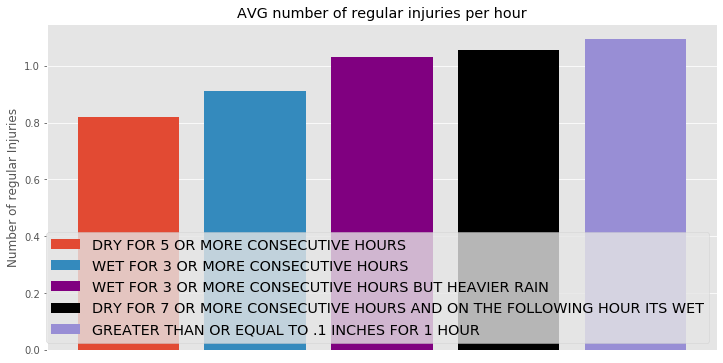

In [338]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.bar(1,np.mean(list(drythirtysixhourdict[1].values())),label='DRY FOR 5 OR MORE CONSECUTIVE HOURS')
ax.bar(2,(sum(wetfourhourinjuriesdict[1].values())/len(wetfourhourinjuriesdict[1].values())),label='WET FOR 3 OR MORE CONSECUTIVE HOURS')
ax.bar(3,(sum(wetfourOonehourinjuriesdict[1].values())/len(wetfourOonehourinjuriesdict[1].values())),color='purple',label='WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVIER RAIN')
ax.bar(4,(sum(wetthirtysixhoursdict[1].values())/len(wetthirtysixhoursdict[1].values())),color='black',label='DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET')
ax.bar(5, np.mean(seriousraininjuries),label='GREATER THAN OR EQUAL TO .1 INCHES FOR 1 HOUR')
ax.set_title('AVG number of regular injuries per hour')
ax.set_ylabel('Number of regular Injuries')
ax.legend(loc='lower right',fontsize='x-large')
ax.get_xaxis().set_visible(False)

In [339]:
print('Null Hypothesis: GREATER THAN OR EQUAL TO .1 INCHES FOR 1 HOUR AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df9 = welch_satterhwaithe_df(seriousraininjuries,wetthirtysixinjuriesnuminjuries)
test_stat9 = welch_test_statistic(seriousraininjuries,wetthirtysixinjuriesnuminjuries)
students9 = stats.t(df9)
pvalue9 = students4.cdf(test_stat9)
print('alpha: .1')
print('pvalue:',pvalue9)
print('Cannot reject null')

Null Hypothesis: GREATER THAN OR EQUAL TO .1 INCHES FOR 1 HOUR AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.577608294423
Cannot reject null


In [340]:
print('Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df4 = welch_satterhwaithe_df(wetfourhoursinjuriesnuminjuries,wetthirtysixinjuriesnuminjuries)
test_stat4 = welch_test_statistic(wetfourhoursinjuriesnuminjuries,wetthirtysixinjuriesnuminjuries)
students4 = stats.t(df4)
pvalue4 = students4.cdf(test_stat4)
print('alpha: .1')
print('pvalue:',pvalue4)
print('Must reject null')

Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.0583281036921
Must reject null


In [341]:
print('Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVY RAIN AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df8 = welch_satterhwaithe_df(wetfourOonehoursinjuries,wetthirtysixinjuriesnuminjuries)
test_stat8 = welch_test_statistic(wetfourOonehoursinjuries,wetthirtysixinjuriesnuminjuries)
students8 = stats.t(df8)
pvalue8 = students4.cdf(test_stat8)
print('alpha: .1')
print('pvalue:',pvalue8)
print('Cannot reject nulll')

Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVY RAIN AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.435702875837
Cannot reject nulll


In [213]:
#print('Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS AND DRY FOR 5 OR MORE HOURS BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
#df5 = welch_satterhwaithe_df(wetfourhoursinjuriesnuminjuries,drythirtysixnuminjuries)
#test_stat5 = welch_test_statistic(wetfourhoursinjuriesnuminjuries,drythirtysixnuminjuries)
#students5 = stats.t(df5)
#pvalue5 = students5.cdf(test_stat5)
#print('alpha: .1')
#print('pvalue:',1 - pvalue5)
#print('Cannot reject null')

In [342]:
print('Null Hypothesis: DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET AND DRY FOR 5 OR MORE HOURS BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df6 = welch_satterhwaithe_df(wetthirtysixinjuriesnuminjuries,drythirtysixnuminjuries)
test_stat6 = welch_test_statistic(wetthirtysixinjuriesnuminjuries,drythirtysixnuminjuries)
students6 = stats.t(df6)
pvalue6 = 1-students6.cdf(test_stat6)
print('alpha: .1')
print('pvalue:',pvalue6)
print('Must reject null')

Null Hypothesis: DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET AND DRY FOR 5 OR MORE HOURS BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.00300034806961
Must reject null


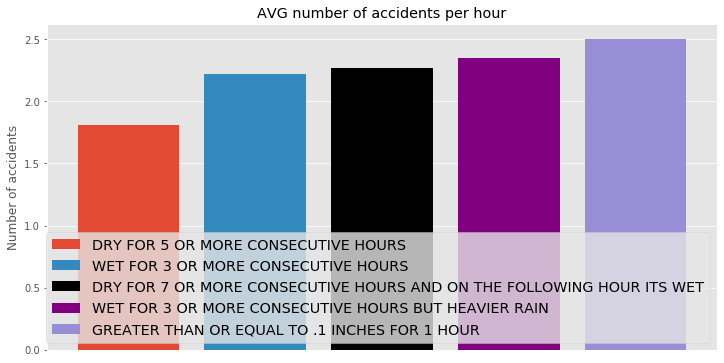

In [349]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.bar(1,np.mean(list(drythirtysixhourdict[0].values())),label='DRY FOR 5 OR MORE CONSECUTIVE HOURS')
ax.bar(2,np.mean(list(wetfourhourinjuriesdict[0].values())),label='WET FOR 3 OR MORE CONSECUTIVE HOURS')
ax.bar(3,np.mean(list(wetthirtysixhoursdict[0].values())),color='black',label='DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET')
ax.bar(4,np.mean(list(wetfourOonehourinjuriesdict[0].values())),color='purple', label='WET FOR 3 OR MORE CONSECUTIVE HOURS BUT HEAVIER RAIN')
ax.bar(5,np.mean(list(seriousrainhourinjuriesdict[0].values())),label='GREATER THAN OR EQUAL TO .1 INCHES FOR 1 HOUR')
ax.set_title('AVG number of accidents per hour')
ax.set_ylabel('Number of accidents')
ax.legend(loc='lower right',fontsize='x-large')
ax.get_xaxis().set_visible(False)

In [230]:
df = welch_satterhwaithe_df(list(drythirtysixvalues),list(wetthirtysixvalues))
test_stat = welch_test_statistic(list(drythirtysixvalues),list(wetthirtysixvalues))
students = stats.t(df)
pvalue = students.cdf(test_stat)
print('p-value:',pvalue,'- Reject null: dry and 7 or more hours of dry but on the following hour are not the same')

p-value: 0.00107953926049 - Reject null: dry and 7 or more hours of dry but on the following hour are not the same


In [229]:
df2 = welch_satterhwaithe_df(list(fourhourswetvalues),list(wetthirtysixvalues))
test_stat2 = welch_test_statistic(list(fourhourswetvalues),list(wetthirtysixvalues))
students2 = stats.t(df2)
pvalue2 = students2.cdf(test_stat2)
print('p-value:',pvalue2,'- Accept null: wet 3 hours and 7 or more hours of dry but on the following hour are the same')

p-value: 0.287584793383 - Accept null: wet 3 hours and 7 or more hours of dry but on the following hour are the same


In [231]:
df7 = welch_satterhwaithe_df(list(wetthirtysixvalues),list(fourOonehourswetvalues))
test_stat7 = welch_test_statistic(list(wetthirtysixvalues),list(fourOonehourswetvalues))
students7 = stats.t(df7)
pvalue7 = students7.cdf(test_stat7)
print('p-value:',pvalue7,'- Accept null: wet 3 hours of heavy rain and 7 or more hours of dry but on the following hour are the same')

p-value: 0.494248129732 - Accept null: wet 3 hours of heavy rain and 7 or more hours of dry but on the following hour are the same


In [262]:
df10 = welch_satterhwaithe_df(list(wetthirtysixvalues),list(seriousrainwetvalues))
test_stat10 = welch_test_statistic(list(wetthirtysixvalues),list(seriousrainwetvalues))
students10 = stats.t(df10)
pvalue10 = students7.cdf(test_stat10)
print('p-value:',pvalue7,'- Accept null: greater than or equal to .1 inches for 1 hour and 7 or more hours of dry but on the following hour are the same')

p-value: 0.494248129732 - Accept null: greater than or equal to .1 inches for 1 hour and 7 or more hours of dry but on the following hour are the same


In [52]:
def getaccidentsperhour(df):
    dic=dict()
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in range(24):
        if i == 23:
            hourly = df[(df['INCDTTM'].dt.time >= datetime.time(i,0)) &
                        (df['INCDTTM'].dt.time <= datetime.time(23,59))].shape[0]
            dic[i]=hourly
        else:
            hourly = df[(df['INCDTTM'].dt.time >= datetime.time(i,0)) &
                        (df['INCDTTM'].dt.time < datetime.time(i+1,0))].shape[0]
            dic[i]=hourly
    return dic

In [53]:
hourlyaccidents = getaccidentsperhour(file2)
hourlyaccidents

{0: 3828,
 1: 3410,
 2: 3579,
 3: 1638,
 4: 1195,
 5: 1626,
 6: 3152,
 7: 6364,
 8: 8303,
 9: 7824,
 10: 7257,
 11: 7992,
 12: 10117,
 13: 9995,
 14: 10395,
 15: 11296,
 16: 11916,
 17: 12726,
 18: 9590,
 19: 7097,
 20: 6105,
 21: 5497,
 22: 5353,
 23: 4564}